In [1]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np


from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import sys
from time import time

import numpy as np

In [2]:
df = pd.read_csv('lyrics.csv')
df.head(10)

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."
5,5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,I heard\nChurch bells ringing\nI heard\nA choi...
6,6,once-in-a-lifetime,2009,beyonce-knowles,Pop,This is just another day that I would spend\nW...
7,7,waiting,2009,beyonce-knowles,Pop,"Waiting, waiting, waiting, waiting\nWaiting, w..."
8,8,slow-love,2009,beyonce-knowles,Pop,[Verse 1:]\nI read all of the magazines\nwhile...
9,9,why-don-t-you-love-me,2009,beyonce-knowles,Pop,"N-n-now, honey\nYou better sit down and look a..."


In [3]:
df['lyrics'].replace('', np.nan, inplace=True)
df.dropna(subset=['lyrics'], inplace=True)
ind_drop = df[df['genre'].apply(lambda x: x.startswith('Other'))].index
df = df.drop(ind_drop)

In [4]:
ind_drop = df[df['genre'].apply(lambda x: x.startswith('Not Available'))].index
df = df.drop(ind_drop)

In [5]:
ind_drop = df[df['lyrics'].apply(lambda x: x.startswith('INSTRUMENTAL'))].index
df = df.drop(ind_drop)
df.drop(columns=['index'])

ind_drop = df[df['lyrics'].apply(lambda x: x.startswith('instrumental'))].index
df = df.drop(ind_drop)
df.drop(columns=['index'])

,song,year,artist,genre,lyrics
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."
5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,I heard\nChurch bells ringing\nI heard\nA choi...
6,once-in-a-lifetime,2009,beyonce-knowles,Pop,This is just another day that I would spend\nW...
7,waiting,2009,beyonce-knowles,Pop,"Waiting, waiting, waiting, waiting\nWaiting, w..."
8,slow-love,2009,beyonce-knowles,Pop,[Verse 1:]\nI read all of the magazines\nwhile...
9,why-don-t-you-love-me,2009,beyonce-knowles,Pop,"N-n-now, honey\nYou better sit down and look a..."


In [6]:
genre=df['genre'].values
lyrics=df['lyrics'].values
true_k = len(np.unique(genre))
print(np.unique(genre), "The total number of genres are", true_k)


#shaping:
lyrics = np.array(lyrics)[:,None]
print(lyrics.shape)
genre = np.array(genre)[:,None]
print(genre.shape)

['Country' 'Electronic' 'Folk' 'Hip-Hop' 'Indie' 'Jazz' 'Metal' 'Pop'
 'R&B' 'Rock'] The total number of genres are 10
(236485, 1)
(236485, 1)


In [7]:
data = np.append(lyrics,genre,axis=1)
data.shape
print(data)

[["Oh baby, how you doing?\nYou know I'm gonna cut right to the chase\nSome women were made but me, myself\nI like to think that I was created for a special purpose\nYou know, what's more special than you? You feel me\nIt's on baby, let's get lost\nYou don't need to call into work 'cause you're the boss\nFor real, want you to show me how you feel\nI consider myself lucky, that's a big deal\nWhy? Well, you got the key to my heart\nBut you ain't gonna need it, I'd rather you open up my body\nAnd show me secrets, you didn't know was inside\nNo need for me to lie\nIt's too big, it's too wide\nIt's too strong, it won't fit\nIt's too much, it's too tough\nHe talk like this 'cause he can back it up\nHe got a big ego, such a huge ego\nI love his big ego, it's too much\nHe walk like this 'cause he can back it up\nUsually I'm humble, right now I don't choose\nYou can leave with me or you could have the blues\nSome call it arrogant, I call it confident\nYou decide when you find on what I'm workin

In [8]:
np.random.shuffle(data)

data_test = data[10001:20001,]
data = data[:10000,]

In [9]:
data_lyrics=data[:,0]
data_genre=data[:,1]

data_lyrics_test = data_test[:,0]
data_genre_test = data_test[:,1]

# print(data_lyrics)
# print(data_genre.shape)

In [10]:
vectorizer = TfidfVectorizer( 
                max_df=0.75, # max doc freq (as a fraction) of any word to include in the vocabulary
                min_df=0.3,   # min doc freq (as doc counts) of any word to include in the vocabulary
                max_features=10000,           # max number of words in the vocabulary
                stop_words='english',         # remove English stopwords
                use_idf=True ) 

In [11]:
labels={'Country':1, 'Electronic':2, 'Folk':3, 'Hip-Hop':4, 'Indie':5, 'Jazz':6,
       'Metal':7, 'Pop':8, 'R&B':9, 'Rock':10}

print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
vectorizer.fit(data_lyrics)

X = vectorizer.transform(data_lyrics)
Y = [labels[i] for i in data_genre]

X_test = vectorizer.transform(data_lyrics_test)
Y_test = [labels[i] for i in data_genre_test]

n_features = X.shape[1]
print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)

Extracting features from the training dataset using a sparse vectorizer
done in 5.231331s
n_samples: 10000, n_features: 7


In [12]:
doc_ind = 1  # Index of an example document
xi = X[doc_ind,:].todense()
term_ind = xi.argsort()[:, ::-1]
xi_sort = xi[0,term_ind]
terms = vectorizer.get_feature_names()

for i in range(n_features):
    term = terms[term_ind[0,i]]
    tfidf = xi[0,term_ind[0,i]]
    print('{0:20s} {1:f} '.format(term, tfidf))

know                 0.667339 
like                 0.522022 
ll                   0.363755 
just                 0.339564 
time                 0.185825 
love                 0.000000 
don                  0.000000 


In [13]:
km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=True)

In [14]:
print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

Clustering sparse data with KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=10, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=True)
Initialization complete
Iteration  0, inertia 2284.290
Iteration  1, inertia 1710.257
Iteration  2, inertia 1688.726
Iteration  3, inertia 1676.577
Iteration  4, inertia 1665.648
Iteration  5, inertia 1659.707
Iteration  6, inertia 1656.966
Iteration  7, inertia 1655.981
Iteration  8, inertia 1655.274
Iteration  9, inertia 1655.029
Iteration 10, inertia 1654.963
Iteration 11, inertia 1654.936
Iteration 12, inertia 1654.907
Iteration 13, inertia 1654.861
Iteration 14, inertia 1654.826
Iteration 15, inertia 1654.815
Converged at iteration 15: center shift 9.119214e-07 within tolerance 8.525091e-06
done in 0.929s



In [15]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
    print()

Cluster 0: just like know don ll time love
Cluster 1: time love ll like know just don
Cluster 2: know don just time ll love like
Cluster 3: love just know like don time ll
Cluster 4: like don know just ll time love
Cluster 5: ll just know like don time love
Cluster 6: time just like ll know love don
Cluster 7: love ll know just don like time
Cluster 8: don ll know just time love like
Cluster 9: like know just ll time love don


In [16]:
labels={'Country':1, 'Electronic':2, 'Folk':3, 'Hip-Hop':4, 'Indie':5, 'Jazz':6,
       'Metal':7, 'Pop':8, 'R&B':9, 'Rock':10}
print(labels.values)
# genre_names
# data_genre
genre_labels=[]
#print(genre_labels.shape)
for j,i in enumerate(data_genre):
    x=labels[i]
    #print(x)
    np.append(genre_labels,x)
    genre_labels.append(x)
#print(genre_labels)

<built-in method values of dict object at 0x1a1cca38b8>


In [17]:
print((Y_test == km.predict(X_test)).sum() / len(Y_test))

0.0556


In [18]:
labelkm = km.labels_
print(labelkm.shape)
print(type(labelkm))


(10000,)
<class 'numpy.ndarray'>


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.                nan]
 [0.02675585 0.00703083 0.02346041 0.02188679 0.02037618 0.03007519
  0.01754386 0.02267003 0.03543307 0.02497027        nan]
 [0.0367893  0.04488913 0.0342131  0.03773585 0.01880878 0.01611171
  0.04247461 0.01007557 0.0226378  0.05350773        nan]
 [0.01895206 0.01568415 0.01857283 0.02264151 0.01097179 0.0236305
  0.01385042 0.03274559 0.00787402 0.01426873        nan]
 [0.05685619 0.02109248 0.10948192 0.03245283 0.37147335 0.08055854
  0.02954755 0.04785894 0.1023622  0.20095125        nan]
 [0.01895206 0.03244997 0.028348   0.01132075 0.01097179 0.0236305
  0.01108033 0.00755668 0.02362205 0.01783591        nan]
 [0.04459309 0.02433748 0.04398827 0.10566038 0.02037618 0.04726101
  0.03231764 0.09319899 0.03838583 0.02734839        nan]
 [0.0613155  0.203894   0.04496579 0.02943396 0.02037618 0.09559613
  0.16989843 0.04282116 0.06496063 0.10463734        nan]
 [

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


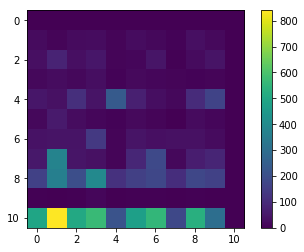

In [19]:
#print(data_genre)
labelkm = km.labels_
from sklearn.metrics import confusion_matrix
C = confusion_matrix(genre_labels,labelkm)

Csum = np.sum(C,axis=0)
Cnorm = C / Csum[None,:]
print(Cnorm)
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()